<a href="https://colab.research.google.com/github/nandhukumar86/AIML-Practice/blob/master/CNN_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-878bf5f5-c433-7c1a-4b92-733f662a3266)


## Basic imports

In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf


## Importing data from Google drive

In [256]:
import os
import cv2
import skimage.io as io


In [174]:
folder = '/content/drive/MyDrive/Part-1 - Plant Seedling Classification Data/train'

for f in os.listdir(folder):
  print(f)

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


In [183]:
X_train = []
y_train = []

In [184]:
for f in os.listdir(folder):
  currentclassfolder = folder + '/' + f
  print(f)
  i = 0;
  for img in os.listdir(currentclassfolder):
    i = i + 1
    currentimagefile = currentclassfolder + '/' + img
    tempImg = cv2.imread(currentimagefile)
    tempImg = cv2.resize(tempImg,(128,128))
    X_train.append(tempImg)
    y_train.append(f)

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


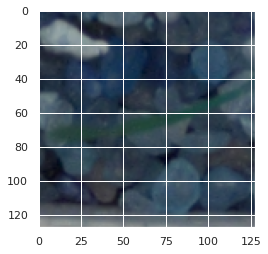

In [185]:
plt.imshow(X_train[45]);

In [186]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [187]:
X_train.shape, y_train.shape

((4767, 128, 128, 3), (4767,))

# Simple CNN


In [189]:
X_train = X_train / 255

In [190]:
import tensorflow as tf


In [191]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

y_train = ohe.fit_transform(y_train.reshape(-1,1)).toarray()


In [192]:
tf.keras.backend.clear_session()

In [193]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout



model = Sequential()

model.add(Conv2D(filters=128, kernel_size=2, activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(15, activation='relu'))
model.add(Dense(12, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 127, 127, 128)     1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0

In [194]:
from tensorflow.keras.optimizers import SGD

opt = SGD(learning_rate=0.005, momentum=0.95)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [195]:
y_train.shape

(4767, 12)

In [196]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split = 0.3, verbose=1) 


Epoch 1/50
209/209 [==============================] - 4s 17ms/step - loss: 2.2839 - accuracy: 0.1753 - val_loss: 5.2663 - val_accuracy: 0.0000e+00
Epoch 2/50
209/209 [==============================] - 3s 14ms/step - loss: 2.1246 - accuracy: 0.1950 - val_loss: 5.9218 - val_accuracy: 0.0000e+00
Epoch 3/50
209/209 [==============================] - 3s 15ms/step - loss: 2.0387 - accuracy: 0.2508 - val_loss: 7.9641 - val_accuracy: 0.0000e+00
Epoch 4/50
209/209 [==============================] - 3s 14ms/step - loss: 1.6313 - accuracy: 0.3954 - val_loss: 6.8788 - val_accuracy: 0.0000e+00
Epoch 5/50
209/209 [==============================] - 3s 14ms/step - loss: 1.4791 - accuracy: 0.4333 - val_loss: 6.7176 - val_accuracy: 0.0000e+00
Epoch 6/50
209/209 [==============================] - 3s 14ms/step - loss: 1.4001 - accuracy: 0.4650 - val_loss: 8.0597 - val_accuracy: 0.0349
Epoch 7/50
209/209 [==============================] - 3s 14ms/step - loss: 1.2696 - accuracy: 0.5474 - val_loss: 8.0361 - 

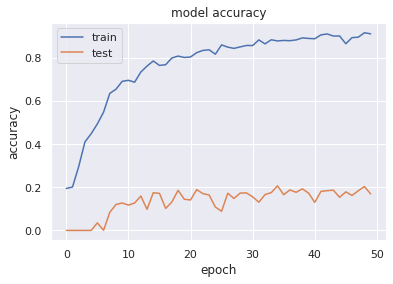

In [197]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [198]:
y_train_predict = model.predict(X_train)


In [232]:
id = np.round(np.random.rand()*1000)
print(y_train_predict[np.int32(id)].argmax())
print(y_train[np.int32(id)].argmax())

1
1


## Using Transfer learning VGG16

In [233]:
from tensorflow.keras.applications import VGG16

In [234]:
basemodel = VGG16(include_top=False, weights='imagenet', input_shape=(128,128,3))


In [235]:
for l in basemodel.layers:
  l.trainable = False;

In [236]:
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization

# set trainable to False for each layer in basemodel
x = Flatten()(basemodel.layers[-1].output)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(12, activation='softmax')(x)

modified_basemodel = Model(inputs=basemodel.input, outputs=x)

In [237]:
modified_basemodel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [238]:
modified_basemodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# "binary_crossentropy" for binary classification.
# "categorical_crossentropy" for multi-class classification.
# "mse" for regression


In [239]:
history = modified_basemodel.fit(X_train, y_train, epochs=25, batch_size=32, validation_split = 0.3) 


Epoch 1/25
105/105 [==============================] - 10s 86ms/step - loss: 1.6592 - accuracy: 0.4476 - val_loss: 4.3616 - val_accuracy: 0.0231
Epoch 2/25
105/105 [==============================] - 6s 57ms/step - loss: 0.5573 - accuracy: 0.8037 - val_loss: 6.0435 - val_accuracy: 0.1230
Epoch 3/25
105/105 [==============================] - 6s 58ms/step - loss: 0.3075 - accuracy: 0.8937 - val_loss: 8.3410 - val_accuracy: 0.1349
Epoch 4/25
105/105 [==============================] - 6s 58ms/step - loss: 0.1796 - accuracy: 0.9442 - val_loss: 10.7974 - val_accuracy: 0.1097
Epoch 5/25
105/105 [==============================] - 6s 58ms/step - loss: 0.1409 - accuracy: 0.9570 - val_loss: 12.6816 - val_accuracy: 0.1433
Epoch 6/25
105/105 [==============================] - 6s 58ms/step - loss: 0.1096 - accuracy: 0.9660 - val_loss: 14.1703 - val_accuracy: 0.1488
Epoch 7/25
105/105 [==============================] - 6s 58ms/step - loss: 0.0757 - accuracy: 0.9764 - val_loss: 14.9643 - val_accuracy: 0

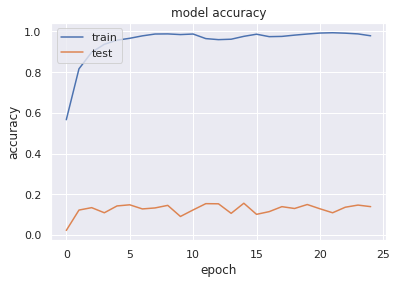

In [240]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [241]:
# y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)



In [247]:
id = np.round(np.random.rand()*1000)
print(y_train_predict[np.int32(id)].argmax())
print(y_train[np.int32(id)].argmax())

2
2


In [250]:
data = {}

data['X_train'] = X_train
data['y_train'] = y_train

In [253]:
import pickle
dbfile = open('data', 'ab')
# source, destination
pickle.dump(data, dbfile)                     
dbfile.close()